In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize=(450,350)
from rdkit.Chem import rdRGroupDecomposition
from rdkit.Chem import rdqueries
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit import Geometry
from rdkit.Chem import PandasTools
rdDepictor.SetPreferCoordGen(True)
import pandas as pd
from collections import defaultdict
from rdkit.Chem import rdFMCS

from PIL import Image as pilImage
from io import BytesIO

from IPython.display import SVG,Image
from ipywidgets import interact

import rdkit

import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network

import src
from src.share import Rgroup

print(rdkit.__version__)

2021.03.3


,r_user_dG.exp,ID,SMILES,Molecule
0,-9.812,30,CS(=O)(=O)c1ccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)cc1,
1,-11.112,28,CNS(=O)(=O)c1ccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2...,
2,-9.785,1oiy,NC(=O)c1ccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)cc1,
3,-9.741,1oi9,Oc1ccc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)cc1,
4,-9.75,32,COc1cc(Nc2nc(OCC3CCCCC3)c3nc[nH]c3n2)ccc1S(N)(...,

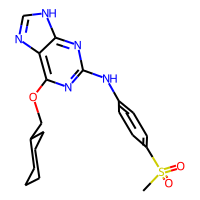
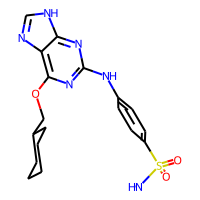
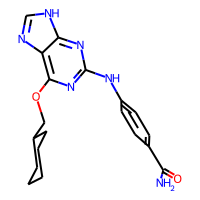
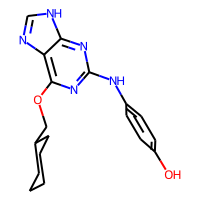
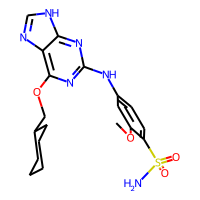

In [2]:
# example file
datadir = '../data/benchmark/qligfep/sdf'
sdfFile = '{}/CDK2_ligands.sdf'.format(datadir)
frame = PandasTools.LoadSDF(sdfFile,smilesName='SMILES',molColName='Molecule',
           includeFingerprints=True)
frame.head()

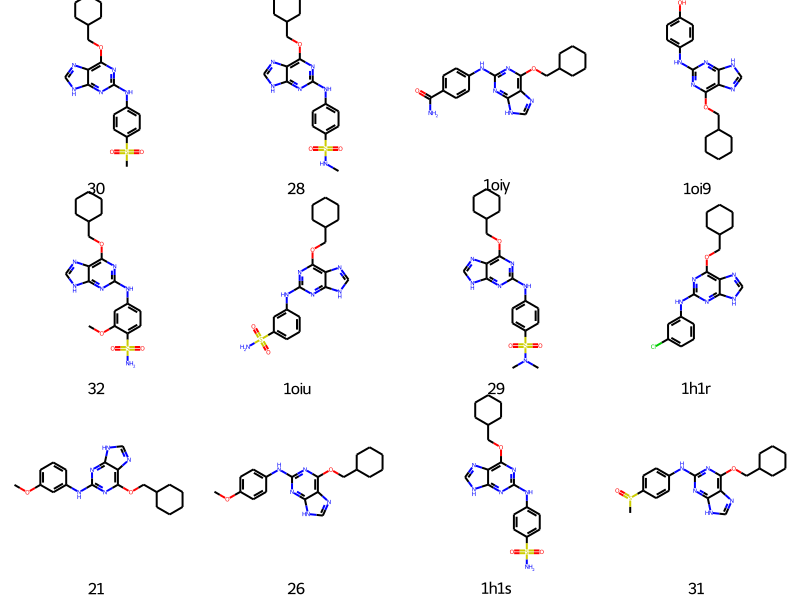

In [3]:
rdDepictor.SetPreferCoordGen(True)
smis = frame['SMILES']
cids = list(frame.ID)
ms = [Chem.MolFromSmiles(x) for x in smis]
for m in ms:
    rdDepictor.Compute2DCoords(m)
Draw.MolsToGridImage(ms[:12],legends=cids,molsPerRow=4)

In [4]:
with Chem.SDMolSupplier(sdfFile) as cdk2mols:
    res=rdFMCS.FindMCS(cdk2mols).smartsString
core = Chem.MolFromSmarts(res)
rdDepictor.SetPreferCoordGen(True)
rdDepictor.Compute2DCoords(core)

0

In [5]:
ps = Chem.AdjustQueryParameters.NoAdjustments()
ps.makeDummiesQueries=True
qcore = Chem.AdjustQueryProperties(core,ps)
mhs = [Chem.AddHs(x,addCoords=True) for x in ms]
mms = [x for x in mhs if x.HasSubstructMatch(qcore)]
for m in mms:
    for atom in m.GetAtoms():
        atom.SetIntProp("SourceAtomIdx",atom.GetIdx())
        
groups,_ = rdRGroupDecomposition.RGroupDecompose([qcore],mms,asSmiles=False,asRows=True)

In [7]:
# Make the label definition non-dependent on user input
lbls=[*groups[0]]
lbls.remove("Core")
overview, images = Rgroup.draw_multiple(mms,groups,qcore,lbls=lbls,legends=cids,subImageSize=(300,250))
Image(overview)
images

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x250 at 0x7FCBA5FCE2B0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x250 at 0x7FCB78DCFE20>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x250 at 0x7FCBA5FCED00>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x250 at 0x7FCBA5FCE2E0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x250 at 0x7FCB78DCFFD0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x250 at 0x7FCB78DFFEE0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x250 at 0x7FCB78DFFD60>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x250 at 0x7FCB78DFF2E0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x250 at 0x7FCB78DFFFD0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x250 at 0x7FCB78DFF9A0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x250 at 0x7FCB78DFF220>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x250 at 0x7FCB78DFFBE0>,
 <PIL.PngImagePl

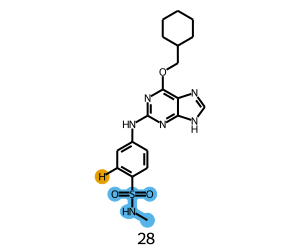

In [10]:
images[1]